In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Match_Information_cleaned.csv")

In [3]:
df.shape

(19632, 31)

In [4]:
df.head()

,gameId,gameDuration,gameVersion,platformId,season,winner,1st_baron,1st_dragon,1st_inhibitor,1st_riftHerald,...,t2_baron_kills,t2_champ_kills,t2_dragon_kills,t2_inhibitor_kills,t2_riftHerald_kills,t2_tower_kills,t2_team_assists,t2_team_gold_earn,t2_team_gold_spen,t2_team_kda
0,1245810008,43.0,11.22.406.3587,EUW1,11,2,1,1,2,1,...,2,52,4,5,1,11,58,89056,86000,2.619048
1,1245827001,20.0,11.22.406.3587,EUW1,11,1,0,2,1,1,...,0,25,1,0,1,0,37,39261,37685,1.476190
2,1243137392,33.0,11.22.406.3587,EUW1,11,2,1,2,2,1,...,0,35,4,1,0,7,53,63064,56970,3.259259
3,1243091838,32.0,11.22.406.3587,EUW1,11,2,2,1,2,2,...,2,43,2,5,1,11,66,71984,63978,3.114286
4,770956820,51.0,11.2.353.8505,EUW1,11,1,2,2,1,1,...,1,66,2,1,0,8,93,103306,96280,1.915663


In [5]:
df['1st_baron'].value_counts()

0    7395
2    6352
1    5885
Name: 1st_baron, dtype: int64

([<matplotlib.patches.Wedge at 0x7fbfa80e5820>,
 [Text(-0.04329134166418585, 1.0991477879416012, 'Blue team'),
  Text(0.04329134166418548, -1.0991477879416012, 'Red team')],
 [Text(-0.023613459089555918, 0.5995351570590551, '51%'),
  Text(0.023613459089555713, -0.5995351570590551, '49%')])

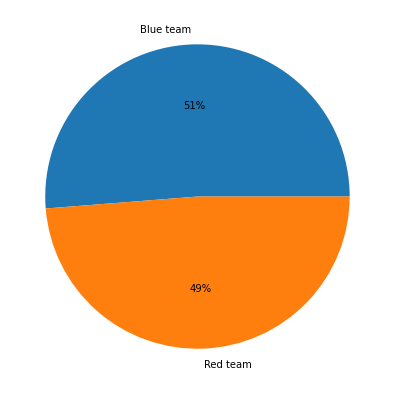

In [6]:
# Analysis different team's winning rate
blue_win = df[df['winner']==1]['gameId'].count()/df.shape[0]
red_win = df[df['winner']==2]['gameId'].count()/df.shape[0]

plt.figure(figsize=(7, 7))
sizes = [blue_win, red_win]
labels = ('Blue team', 'Red team')
plt.pie(sizes, labels = labels, autopct='%1.0f%%')

From the previous graph, we find out that the data set is very balances. Blue team and red team both have almost 50% rate to win, that means we don't have to worry about imbalance data issue.

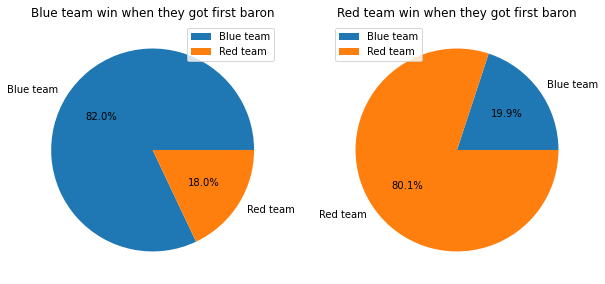

In [7]:
blue_1st_baron = df[(df['winner'] == 1) & (df['1st_baron'] == 1)]['gameId'].count() / df[df['1st_baron'] == 1]['gameId'].count()
red_1st_baron = df[(df['winner'] == 2) & (df['1st_baron'] == 2)]['gameId'].count() / df[df['1st_baron'] == 2]['gameId'].count()

plt.figure(figsize=(10, 10))

p1 = plt.subplot(1, 2, 1)
labels = ('Blue team', 'Red team')
p1.pie([blue_1st_baron, 1 - blue_1st_baron], labels = labels, autopct='%1.1f%%')
p1.set_title("Blue team win when they got first baron")
plt.legend()

p2 = plt.subplot(1, 2, 2)
labels = ('Blue team', 'Red team')
p2.pie([1- red_1st_baron, red_1st_baron], labels = labels, autopct='%1.1f%%')
p2.set_title("Red team win when they got first baron")
plt.legend()


Text(0.5, 1.0, 'Team kill first baron win rate')

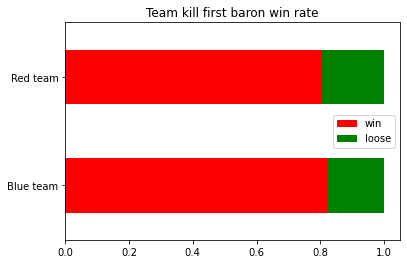

In [8]:
labels = ['Blue team', 'Red team']

num_list = [blue_1st_baron, red_1st_baron]
num_list_1 = [1- blue_1st_baron, 1- red_1st_baron]

dd = pd.DataFrame({'win': num_list, 'loose':num_list_1}, index=labels)
ax = dd.plot.barh(color={"win": "red", "loose": "green"}, stacked = True)

plt.title("Team kill first baron win rate")

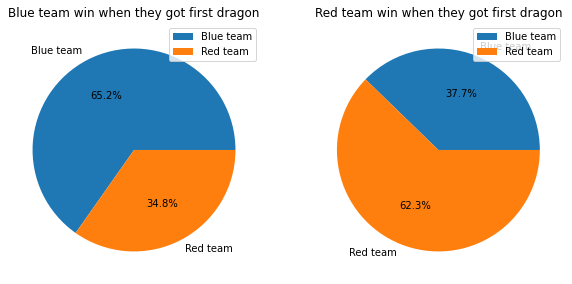

In [9]:
blue_1st_dragon = df[(df['winner'] == 1) & (df['1st_dragon'] == 1)]['gameId'].count() / df[df['1st_dragon'] == 1]['gameId'].count()
red_1st_dragon = df[(df['winner'] == 2) & (df['1st_dragon'] == 2)]['gameId'].count() / df[df['1st_dragon'] == 2]['gameId'].count()

plt.figure(figsize=(10, 10))

p1 = plt.subplot(1, 2, 1)
labels = ('Blue team', 'Red team')
p1.pie([blue_1st_dragon, 1 - blue_1st_dragon], labels = labels, autopct='%1.1f%%')
p1.set_title("Blue team win when they got first dragon")
plt.legend()

p2 = plt.subplot(1, 2, 2)
labels = ('Blue team', 'Red team')
p2.pie([1- red_1st_dragon, red_1st_dragon], labels = labels, autopct='%1.1f%%')
p2.set_title("Red team win when they got first dragon")
plt.legend()

Text(0.5, 1.0, 'Team kill first dragon win rate')

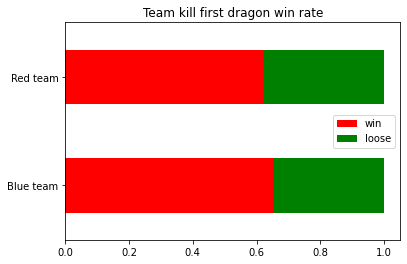

In [10]:
labels = ['Blue team', 'Red team']

num_list = [blue_1st_dragon, red_1st_dragon]
num_list_1 = [1- blue_1st_dragon, 1- red_1st_dragon]

dd = pd.DataFrame({'win': num_list, 'loose':num_list_1}, index=labels)
ax = dd.plot.barh(color={"win": "red", "loose": "green"}, stacked = True)

plt.title("Team kill first dragon win rate")

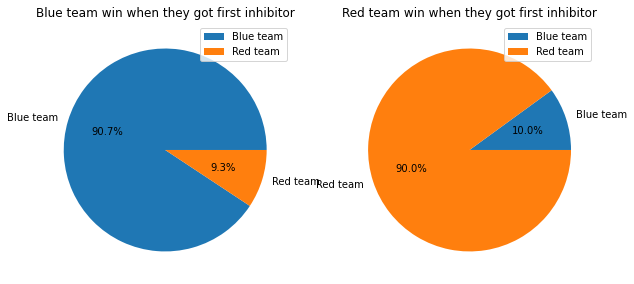

In [11]:
blue_1st_inhibitor = df[(df['winner'] == 1) & (df['1st_inhibitor'] == 1)]['gameId'].count() / df[df['1st_inhibitor'] == 1]['gameId'].count()
red_1st_inhibitor = df[(df['winner'] == 2) & (df['1st_inhibitor'] == 2)]['gameId'].count() / df[df['1st_inhibitor'] == 2]['gameId'].count()

plt.figure(figsize=(10, 10))

p1 = plt.subplot(1, 2, 1)
labels = ('Blue team', 'Red team')
p1.pie([blue_1st_inhibitor, 1 - blue_1st_inhibitor], labels = labels, autopct='%1.1f%%')
p1.set_title("Blue team win when they got first inhibitor")
plt.legend()

p2 = plt.subplot(1, 2, 2)
labels = ('Blue team', 'Red team')
p2.pie([1- red_1st_inhibitor, red_1st_inhibitor], labels = labels, autopct='%1.1f%%')
p2.set_title("Red team win when they got first inhibitor")
plt.legend()

Text(0.5, 1.0, 'Team kill first inhibitor win rate')

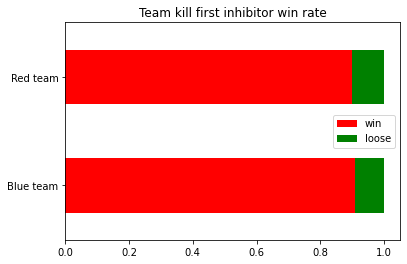

In [12]:
labels = ['Blue team', 'Red team']

num_list = [blue_1st_inhibitor, red_1st_inhibitor]
num_list_1 = [1- blue_1st_inhibitor, 1- red_1st_inhibitor]

dd = pd.DataFrame({'win': num_list, 'loose':num_list_1}, index=labels)
ax = dd.plot.barh(color={"win": "red", "loose": "green"}, stacked = True)

plt.title("Team kill first inhibitor win rate")

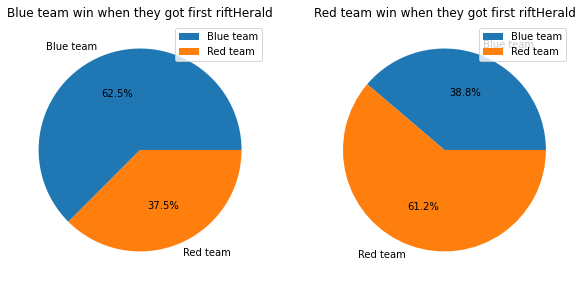

In [13]:
blue_1st_riftHerald = df[(df['winner'] == 1) & (df['1st_riftHerald'] == 1)]['gameId'].count() / df[df['1st_riftHerald'] == 1]['gameId'].count()
red_1st_riftHerald = df[(df['winner'] == 2) & (df['1st_riftHerald'] == 2)]['gameId'].count() / df[df['1st_riftHerald'] == 2]['gameId'].count()

plt.figure(figsize=(10, 10))

p1 = plt.subplot(1, 2, 1)
labels = ('Blue team', 'Red team')
p1.pie([blue_1st_riftHerald, 1 - blue_1st_riftHerald], labels = labels, autopct='%1.1f%%')
p1.set_title("Blue team win when they got first riftHerald")
plt.legend()

p2 = plt.subplot(1, 2, 2)
labels = ('Blue team', 'Red team')
p2.pie([1- red_1st_riftHerald, red_1st_riftHerald], labels = labels, autopct='%1.1f%%')
p2.set_title("Red team win when they got first riftHerald")
plt.legend()

Text(0.5, 1.0, 'Team kill first inhibitor win rate')

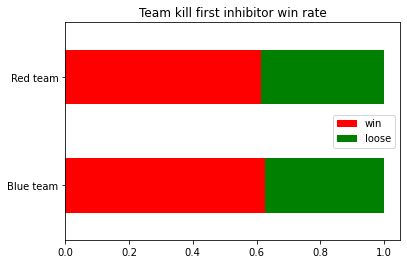

In [14]:
num_list = [blue_1st_riftHerald, red_1st_riftHerald]
num_list_1 = [1- blue_1st_riftHerald, 1- red_1st_riftHerald]

dd = pd.DataFrame({'win': num_list, 'loose':num_list_1}, index=labels)
ax = dd.plot.barh(color={"win": "red", "loose": "green"}, stacked = True)

plt.title("Team kill first inhibitor win rate")

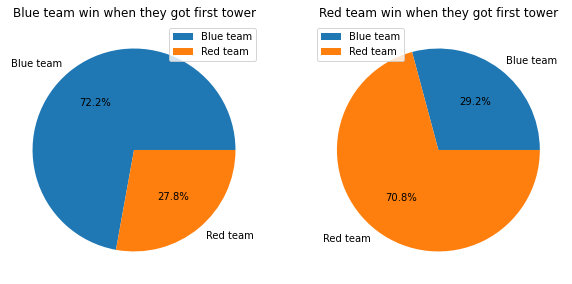

In [15]:
blue_1st_tower = df[(df['winner'] == 1) & (df['1st_tower'] == 1)]['gameId'].count() / df[df['1st_tower'] == 1]['gameId'].count()
red_1st_tower = df[(df['winner'] == 2) & (df['1st_tower'] == 2)]['gameId'].count() / df[df['1st_tower'] == 2]['gameId'].count()

plt.figure(figsize=(10, 10))

p1 = plt.subplot(1, 2, 1)
labels = ('Blue team', 'Red team')
p1.pie([blue_1st_tower, 1 - blue_1st_tower], labels = labels, autopct='%1.1f%%')
p1.set_title("Blue team win when they got first tower")
plt.legend()

p2 = plt.subplot(1, 2, 2)
labels = ('Blue team', 'Red team')
p2.pie([1- red_1st_tower, red_1st_tower], labels = labels, autopct='%1.1f%%')
p2.set_title("Red team win when they got first tower")
plt.legend()

Text(0.5, 1.0, 'Team kill first tower win rate')

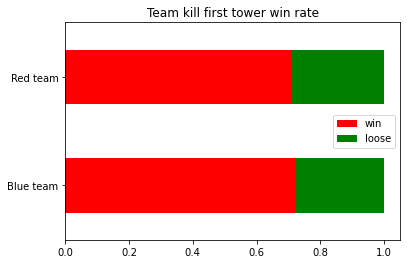

In [16]:
labels = ['Blue team', 'Red team']

num_list = [blue_1st_tower, red_1st_tower]
num_list_1 = [1- blue_1st_tower, 1- red_1st_tower]

dd = pd.DataFrame({'win': num_list, 'loose':num_list_1}, index=labels)
ax = dd.plot.barh(color={"win": "red", "loose": "green"}, stacked = True)

plt.title("Team kill first tower win rate")